# Skip-gram word2vec model 
Skip-gram model is trained to predict surrounding words given the current word.

*I love green eggs and ham.*

Assume a window size of three, this sentence can be broken down into the following sets of (context, word) pairs:

([I, green], love)

([love, eggs], green)

([green, and], eggs)

...

Since the skip-gram model predicts a context word given the center word, we can convert the preceding dataset to one of (input, output) pairs. That is, given an input word, we expect the skip-gram model to predict the output word:

(love, I), (love, green), (green, love), (green, eggs), (eggs, green), (eggs, and), …

We can also generate additional negative samples by pairing each input word with some random word in the vocabulary. For example:

(love, Sam), (love, zebra), (green, thing), …

Finally, we generate positive and negative examples for our classifier:

((love, I), 1), ((love, green), 1), …, ((love, Sam), 0), ((love, zebra), 0), …

![Skip-gram model](https://i.imgur.com/n78k91P.png)

In [5]:
%matplotlib inline
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer, one_hot
from sklearn.metrics.pairwise import cosine_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import nltk
import numpy as np
import operator

np.random.seed(42)

BATCH_SIZE = 128
NUM_EPOCHS = 20

In [8]:
lines = []
fin = open("alice_in_wonderland.txt", "r")
for line in fin:
#############################################################################
# TODO: Write a for loop to read in the corpus.                             #
#############################################################################
    line=line.strip()
    if len(line)==0:
        continue
    lines.append(line)
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################
fin.close()

In [9]:
#     line = line.strip()
#     if len(line) == 0:
#         continue
#     lines.append(line)

In [12]:
sents = nltk.sent_tokenize(" ".join(lines))

#############################################################################
# TODO: Use tokenizer to tokenize the corpus.                               #
#############################################################################
tokenizer=Tokenizer(5000)
tokens=tokenizer.fit_on_texts(sents)
vocab_size=len(tokenizer.word_index)+1
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

xs = []
ys = []
for sent in sents:
#############################################################################
# TODO: Create training data for skipgram.                                  #
#############################################################################
    embedding = one_hot(sent, vocab_size)
    triples = list(nltk.trigrams(embedding))
    w_lefts = [x[0] for x in triples]
    w_centers = [x[1] for x in triples]
    w_rights = [x[2] for x in triples]
    xs.extend(w_centers)
    ys.extend(w_lefts)
    xs.extend(w_centers)
    ys.extend(w_rights)
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################


In [13]:
# tokenizer = Tokenizer(5000)  # use top 5000 words only
# tokens = tokenizer.fit_on_texts(sents)
# vocab_size = len(tokenizer.word_counts) + 1

#     embedding = one_hot(sent, vocab_size)
#     triples = list(nltk.trigrams(embedding))
#     w_lefts = [x[0] for x in triples]
#     w_centers = [x[1] for x in triples]
#     w_rights = [x[2] for x in triples]
#     xs.extend(w_centers)
#     ys.extend(w_lefts)
#     xs.extend(w_centers)
#     ys.extend(w_rights)

In [15]:
ohe = OneHotEncoder(n_values=vocab_size)
#############################################################################
# TODO: Use one hot encoder to fit on the corpus.                           #
#############################################################################
X = ohe.fit_transform(np.array(xs).reshape(-1, 1)).todense()
Y = ohe.fit_transform(np.array(ys).reshape(-1, 1)).todense()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3,
                                                random_state=42)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
#############################################################################
#                          END OF YOUR CODE                                 #
#############################################################################

((34405, 2647), (14745, 2647), (34405, 2647), (14745, 2647))


In [ ]:
# X = ohe.fit_transform(np.array(xs).reshape(-1, 1)).todense()
# Y = ohe.fit_transform(np.array(ys).reshape(-1, 1)).todense()
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3,
#                                                 random_state=42)
# print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

In [16]:
model = Sequential()
model.add(Dense(300, input_shape=(Xtrain.shape[1],)))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(Ytrain.shape[1]))
model.add(Activation("softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", 
              metrics=["accuracy"])
history = model.fit(Xtrain, Ytrain, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, verbose=1,
                    validation_data=(Xtest, Ytest))

Train on 34405 samples, validate on 14745 samples
Epoch 1/20
34405/34405 [==============================] - 28s 809us/step - loss: 6.1851 - acc: 0.0575 - val_loss: 5.7904 - val_acc: 0.0581
Epoch 2/20
34405/34405 [==============================] - 26s 742us/step - loss: 5.7059 - acc: 0.0611 - val_loss: 5.7458 - val_acc: 0.0669
Epoch 3/20
34405/34405 [==============================] - 26s 766us/step - loss: 5.6243 - acc: 0.0689 - val_loss: 5.7074 - val_acc: 0.0697
Epoch 4/20
34405/34405 [==============================] - 26s 759us/step - loss: 5.5591 - acc: 0.0764 - val_loss: 5.6691 - val_acc: 0.0821
Epoch 5/20
34405/34405 [==============================] - 31s 902us/step - loss: 5.4987 - acc: 0.0854 - val_loss: 5.6414 - val_acc: 0.0890
Epoch 6/20
34405/34405 [==============================] - 28s 810us/step - loss: 5.4457 - acc: 0.0950 - val_loss: 5.6206 - val_acc: 0.0964
Epoch 7/20
34405/34405 [==============================] - 24s 704us/step - loss: 5.4003 - acc: 0.1005 - val_loss: 5.

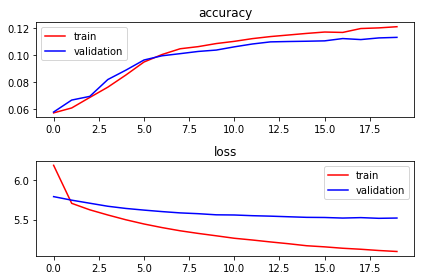

In [20]:
# plot loss function
plt.subplot(211)
plt.title("accuracy")
plt.plot(history.history["acc"], color="r", label="train")
plt.plot(history.history["val_acc"], color="b", label="validation")
plt.legend(loc="best")

plt.subplot(212)
plt.title("loss")
plt.plot(history.history["loss"], color="r", label="train")
plt.plot(history.history["val_loss"], color="b", label="validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [18]:
# evaluate model
score = model.evaluate(Xtest, Ytest, verbose=1)
print("Test score: {:.3f}, accuracy: {:.3f}".format(score[0], score[1]))

# using the word2vec model
word2idx = tokenizer.word_index
idx2word = {v:k for k, v in word2idx.items()}

# retrieve the weights from the first dense layer. This will convert
# the input vector from a one-hot sum of two words to a dense 300 
# dimensional representation
W, b = model.layers[0].get_weights()

idx2emb = {}    
for word in word2idx.keys():
    wid = word2idx[word]
    vec_in = ohe.fit_transform(np.array(wid)).todense()
    vec_emb = np.dot(vec_in, W)
    idx2emb[wid] = vec_emb

for word in ["stupid", "alice", "succeeded"]:
    wid = word2idx[word]
    source_emb = idx2emb[wid]
    distances = []
    for i in range(1, vocab_size):
        if i == wid:
            continue
        target_emb = idx2emb[i]
        distances.append(((wid, i), 
                         cosine_distances(source_emb, target_emb)))
    sorted_distances = sorted(distances, key=operator.itemgetter(1))[0:10]
    predictions = [idx2word[x[0][1]] for x in sorted_distances]
    print("{:s} => {:s}".format(word, ", ".join(predictions)))

14745/14745 [==============================] - 5s 348us/step
Test score: 5.521, accuracy: 0.113
stupid => dressed, should, resting, beloved, arches, come, died, the, scolded, footman's
alice => ou, bring, am, confusing, fancy, shape, missed, alarmed, spot, laughing
succeeded => persons, moon, lastly, conduct, seals, stockings, pretexts, what, ear, 0
